    Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

### Importing the required Libraries

In [1]:
# Importing the basic libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# importing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
fraud = pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Performing EDA on the dataset

In [3]:
# to get the information of the datafile
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
# to check the null values of the data
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
print("Dimensions -",fraud.shape)
print("Column names -",fraud.columns)

Dimensions - (600, 6)
Column names - Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')


In [6]:
# summarising the information using crosstab
pd.crosstab(fraud['Work.Experience'],fraud['Urban']).mean()

Urban
NO     9.612903
YES    9.741935
dtype: float64

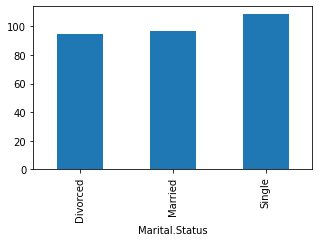

In [7]:
# Plotting barplot using crosstab function
plt.figure(figsize=(5,3))
pd.crosstab(fraud['Urban'],fraud['Marital.Status']).mean().plot(kind='bar');

In [8]:
# to check the dimensions of duplicates in the data
fraud[fraud.duplicated()].shape

(0, 6)

#### Outlier Check

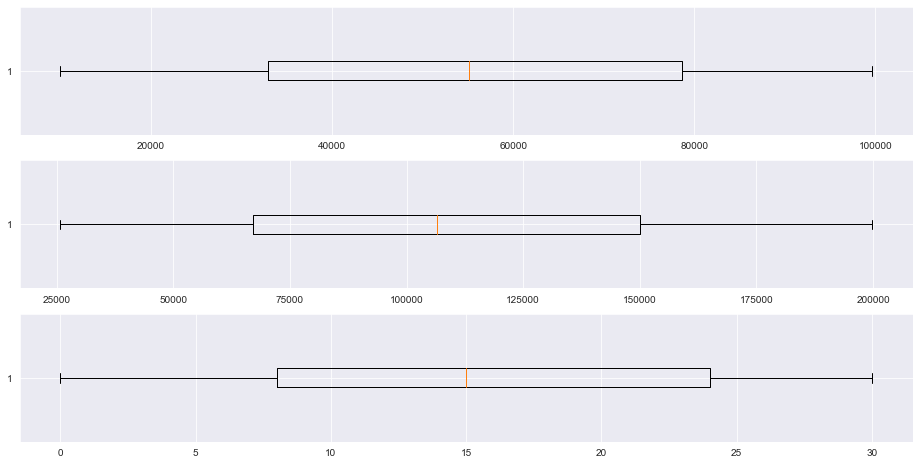

In [9]:
# checking for the Outliers in the variables if present
sns.set_style(style='darkgrid')
plt.figure(figsize=(16,8))
plt.subplot(311)
plt.boxplot(fraud["Taxable.Income"], vert=False)

plt.subplot(312)
plt.boxplot(fraud["City.Population"], vert=False)

plt.subplot(313)
plt.boxplot(fraud["Work.Experience"], vert=False)
plt.show()

#### Encoding of Categorical Variables

In [10]:
# Changing the datatype of the varibles from object to category to perform label encoding
fraud[['Undergrad','Marital.Status','Urban']] = fraud[['Undergrad','Marital.Status',
                                                       'Urban']].astype('category')
fraud1 = fraud
fraud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    category
 1   Marital.Status   600 non-null    category
 2   Taxable.Income   600 non-null    int64   
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    category
dtypes: category(3), int64(3)
memory usage: 16.3 KB


In [11]:
# label Encoding using cat.codes
fraud1['Undergrad'] = fraud1['Undergrad'].cat.codes
fraud1['Marital.Status'] = fraud1['Marital.Status'].cat.codes
fraud1['Urban'] = fraud1['Urban'].cat.codes

fraud1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


#### Now, Assuming that if Taxable.Income <= 30000, as "Risky = 0" and the others as "Good = 1".

In [12]:
# to get the minimum and maximum values of the column "Taxable.Income"
print("Min : ",fraud1["Taxable.Income"].min())
print("Max : ",fraud1["Taxable.Income"].max())

Min :  10003
Max :  99619


In [13]:
fraud1["Tax"] = pd.cut(fraud1["Taxable.Income"], bins = [10002,30000,99620], labels=["Risky", "Good"])
fraud1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [14]:
# label encoding for the 'Tax' column
fraud1[['Tax']] = fraud1[['Tax']].astype('category')
fraud2 = fraud1
fraud2['Tax'] = fraud2['Tax'].cat.codes
fraud2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


In [15]:
# to change Taxable.Income column as the first column
fraud2.insert(0, 'Taxable_Income', fraud2.iloc[:,2])
fraud2 = fraud2.drop(fraud2.columns[[3]], axis=1)
fraud2.head()

,Taxable_Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax
0,68833,0,2,50047,10,1,1
1,33700,1,0,134075,18,1,1
2,36925,0,1,160205,30,1,1
3,50190,1,2,193264,15,1,1
4,81002,0,1,27533,28,0,1


### Normalization of the data

In [16]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

fraud_norm = norm_func(fraud2.iloc[:,1:])
fraud_norm.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax
0,0.0,1.0,0.139472,0.333333,1.0,1.0
1,1.0,0.0,0.622394,0.600000,1.0,1.0
2,0.0,0.5,0.772568,1.000000,1.0,1.0
3,1.0,1.0,0.962563,0.500000,1.0,1.0
4,0.0,0.5,0.010081,0.933333,0.0,1.0


### Train and Test Split
    Splitting the data into Train and Test data

In [17]:
X = fraud_norm.drop(['Tax'],axis=1)
y = fraud_norm['Tax']

# Splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

### K-Fold Cross Validation

In [18]:
kfold = KFold(n_splits=10, shuffle=True)

### Building Model using Random Forest Classifier 

In [19]:
model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
model.fit(X_train,y_train)
result = cross_val_score(model, X_train, y_train, cv=kfold)
print(result.mean())

0.7479166666666667


In [20]:
preds = model.predict(X_test)
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1.])

In [21]:
pd.crosstab(y_test, preds)

col_0,0.0,1.0
Tax,,
0.0,1,22
1.0,9,88


In [22]:
# to get the Accuracy 
np.mean(preds==y_test)*100

74.16666666666667

### Conclusion
- On the application of Random Forest Classifier, we got an accuracy score of 74.16%.